In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
# Initialize the Qiskit Runtime Service
from test_utils import read_account_file

In [2]:
account = read_account_file('account_info.conf')  # Use the updated account file name
service = QiskitRuntimeService(channel="ibm_cloud", instance=account['instance'], token=account['token'])
backend = service.least_busy()
print(f"Using backend: {backend.name}")

Using backend: ibm_sherbrooke


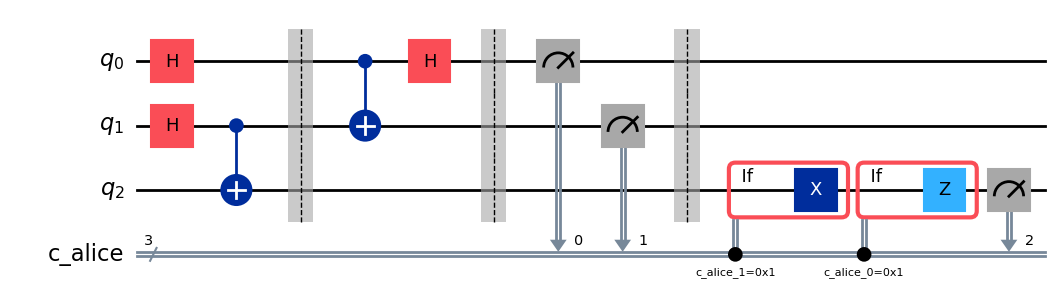

In [3]:
# Create a quantum circuit for entanglement and measurement then draw it
qr = QuantumRegister(3, name='q')
cr_alice = ClassicalRegister(3, name='c_alice')
qc = QuantumCircuit(qr, cr_alice)

qc.h(0)  # Apply Hadamard gate to qubit 0

qc.h(1)  # Apply Hadamard gate to qubit 0
qc.cx(1, 2)  # Apply CNOT gate to entangle qubit 0 and qubit 1
qc.barrier()
qc.draw("mpl")
# Apply
qc.cx(0, 1)  # Apply CNOT gate to entangle qubit 0 and qubit 1
qc.h(0)  # Apply Hadamard gate to qubit 0
qc.barrier()

qc.measure([0, 1], [0, 1])  # Measure both qubits
qc.barrier()

with qc.if_test((cr_alice[1], 1)):
    qc.x(qr[2])  # Apply X gate to q2
with qc.if_test((cr_alice[0], 1)):
    qc.z(qr[2])  # Apply Z gate to q2

qc.measure(qr[2], cr_alice[2])  # Measure q2
# Draw the circuit
qc.draw("mpl")

In [5]:
# Transpile the circuit using a preset pass manager
pm = generate_preset_pass_manager(backend)
# Transpile the circuit
transpiled_circuit = pm.run(qc)
# Create a sampler instance
sampler = Sampler(mode=backend)
# Sample the transpiled circuit
job = sampler.run([transpiled_circuit])
print(f"Job ID: {job.job_id()}")

Job ID: d1m0gnj9fb3c73eia05g


In [ ]:

# Get the results
results = job.result()
# Plot the histogram of results using cregisters
counts = results[0].data.c.get_counts()
# Plot the histogram
plot_histogram(counts, title="Entanglement Measurement Results")
# Show the plot
